In [1]:
import numpy as np
import torch
import pandas as pd

import matplotlib.pyplot as plt

from collections import namedtuple
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import data_processing as dp
import rnn_classifier as ac
import model_utilities_rnn as mu 
import evaluation as ev
import vocab as vo

In [3]:
vocab1, all_labels, sents1, labels1 = dp.load_problem(lang='fr', max_sent_length=100)

In [4]:
vocab1 = vo.Vocab("./embeds_fr.vec", max_sent_length=100)

In [ ]:
batch_sampler_1 = mu.BatchSampler(sents=sents1, labels=labels1, vocab=vocab1, all_labels=all_labels, batch_size=128)

In [ ]:
vocab2, _, sents2, labels2 = dp.load_problem(lang='en', max_sent_length=100)
vocab2 = vo.Vocab("./embeds_en.vec", max_sent_length=100)

In [ ]:
batch_sampler_2 = mu.BatchSampler(sents=sents2, labels=labels2, vocab=vocab2, all_labels=all_labels, batch_size=128)

In [6]:
del cls
import gc
gc.collect()
torch.cuda.empty_cache()

NameError: name 'cls' is not defined

In [6]:
cls = ac.RnnClassifier(100, n_topics=len(all_labels))

In [ ]:
cls = cls.cuda()

In [ ]:
cls

In [ ]:
trainer = mu.Trainer(cls)

In [ ]:
# trainer.restore("./rnn_checkpoint.ckpt")

In [ ]:
validation_sets = {
    "orig":batch_sampler_1.get_valid(),
    "other":batch_sampler_2.get_valid(),
}

In [12]:
trainer.train(batch_sampler=batch_sampler, n_epochs=200, max_iterations=10**5, validation_sets=validation_sets, save_path="./rnn_checkpoint.ckpt", save_every=10)

0it [00:00, ?it/s]

Starting epoch  0


77it [00:08,  8.57it/s]


KeyboardInterrupt: 

In [40]:
cls

RnnClassifier(
  (rnn_cell): LSTM(100, 128, batch_first=True)
  (dense): Linear(in_features=128, out_features=256)
  (logits_layer): Linear(in_features=256, out_features=26)
  (softmax_layer): Softmax()
  (loss_function): CrossEntropyLoss(
  )
  (dropout): Dropout(p=0.5)
)

In [18]:
x_1, mask_1, y_1 = trainer.prepare_data(*batch_sampler.get_test())
y_1 = y_1.data.cpu().numpy()

In [19]:
def get_y(y, all_labels):
    res_y = np.zeros(shape=(len(y), len(all_labels)))
    for item_id, cur_label in enumerate(y):
            res_y[item_id, cur_label] = 1
            
    return res_y

In [20]:
y_1 = get_y(y_1, all_labels)

In [21]:
import gc
gc.collect()

189

In [22]:
trainer.model.eval()

RnnClassifier(
  (rnn_cell): LSTM(100, 128, batch_first=True)
  (dense): Linear(in_features=128, out_features=256)
  (logits_layer): Linear(in_features=256, out_features=26)
  (softmax_layer): Softmax()
  (loss_function): CrossEntropyLoss(
  )
  (dropout): Dropout(p=0.5)
)

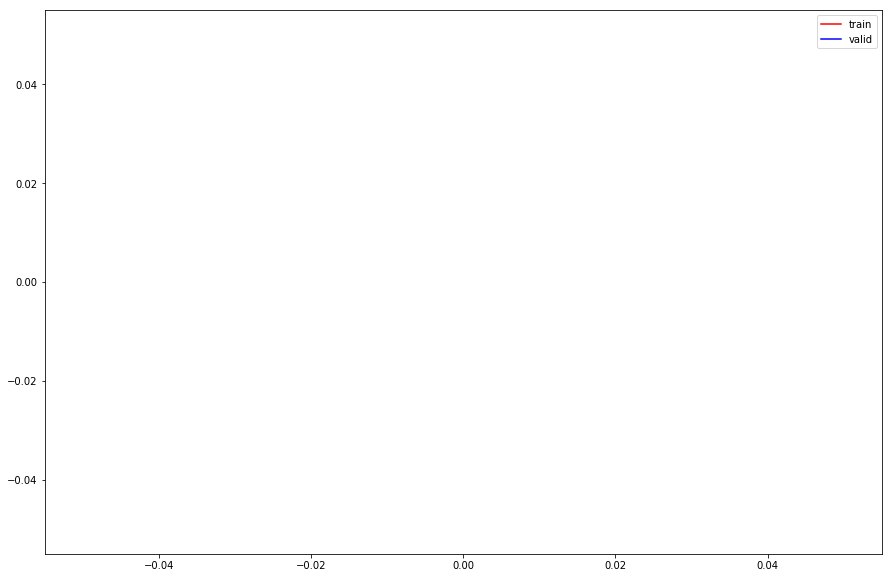

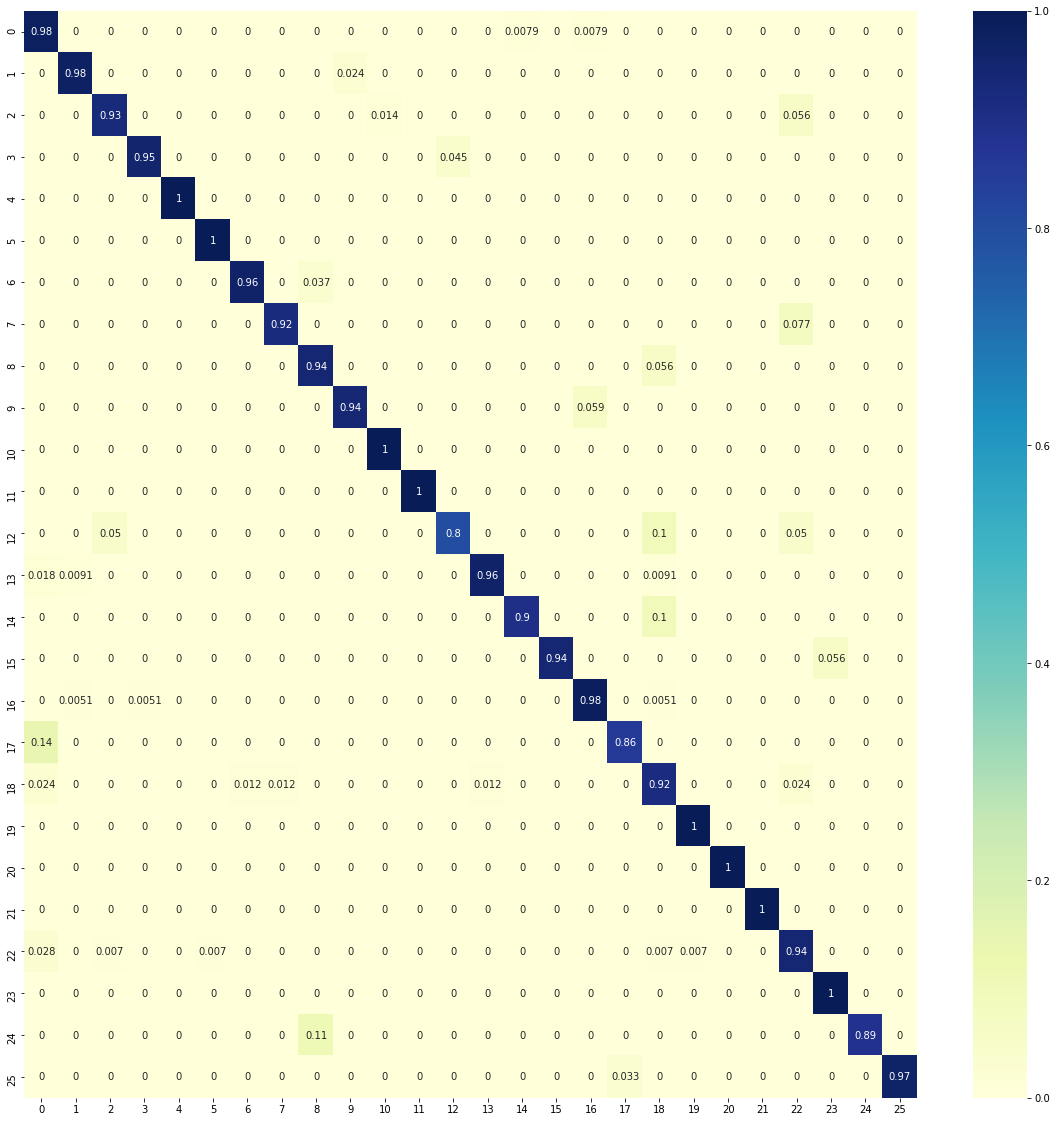

In [23]:
res_1 = ev.describe(trainer, x_1, mask_1, y_1)

In [24]:
res_1

((980, 1024, 0.95703125),
 {0: (124, 133, 0.9323308270676691),
  1: (40, 42, 0.9523809523809523),
  2: (66, 68, 0.9705882352941176),
  3: (21, 22, 0.9545454545454546),
  4: (6, 6, 1.0),
  5: (21, 22, 0.9545454545454546),
  6: (26, 27, 0.9629629629629629),
  7: (12, 13, 0.9230769230769231),
  8: (17, 19, 0.8947368421052632),
  9: (16, 17, 0.9411764705882353),
  10: (4, 5, 0.8),
  11: (12, 12, 1.0),
  12: (16, 17, 0.9411764705882353),
  13: (106, 107, 0.9906542056074766),
  14: (9, 10, 0.9),
  15: (17, 17, 1.0),
  16: (192, 194, 0.9896907216494846),
  17: (6, 7, 0.8571428571428571),
  18: (76, 83, 0.9156626506024096),
  19: (3, 4, 0.75),
  20: (13, 13, 1.0),
  21: (2, 2, 1.0),
  22: (135, 143, 0.9440559440559441),
  23: (3, 4, 0.75),
  24: (8, 8, 1.0),
  25: (29, 29, 1.0)},
 {0: (124, 126, 0.9841269841269841),
  1: (40, 41, 0.975609756097561),
  2: (66, 71, 0.9295774647887324),
  3: (21, 22, 0.9545454545454546),
  4: (6, 6, 1.0),
  5: (21, 21, 1.0),
  6: (26, 27, 0.9629629629629629),
  7

In [18]:
# batch_sampler.sents[0]
del vocab2, sents2, labels2

NameError: name 'vocab2' is not defined

In [20]:
# cls.embeddings = vocab2.embeddings
# cls.word_embeddings = torch.nn.Embedding(cls.vocab_size, cls.embedding_dim)
# cls.word_embeddings.weight = torch.nn.Parameter(torch.from_numpy(cls.embeddings).float(), requires_grad=False)


In [27]:
x_2, mask_2, y_2 = trainer.prepare_data(*batch_sampler_2.get_test())
y_2 = get_y(y_2.data.cpu().numpy(), all_labels)

In [31]:
trainer.model.eval()

RnnClassifier(
  (rnn_cell): LSTM(100, 128, batch_first=True)
  (dense): Linear(in_features=128, out_features=256)
  (logits_layer): Linear(in_features=256, out_features=26)
  (softmax_layer): Softmax()
  (loss_function): CrossEntropyLoss(
  )
  (dropout): Dropout(p=0.5)
)

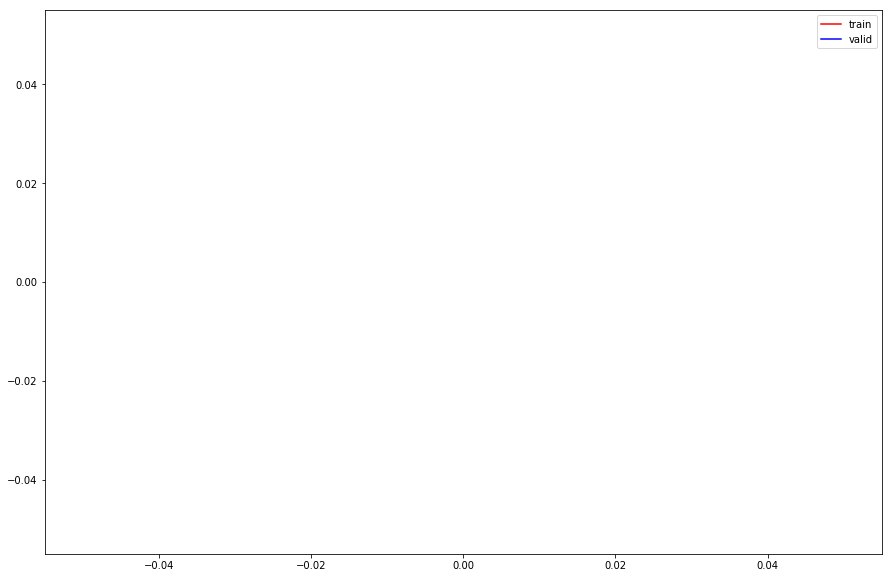

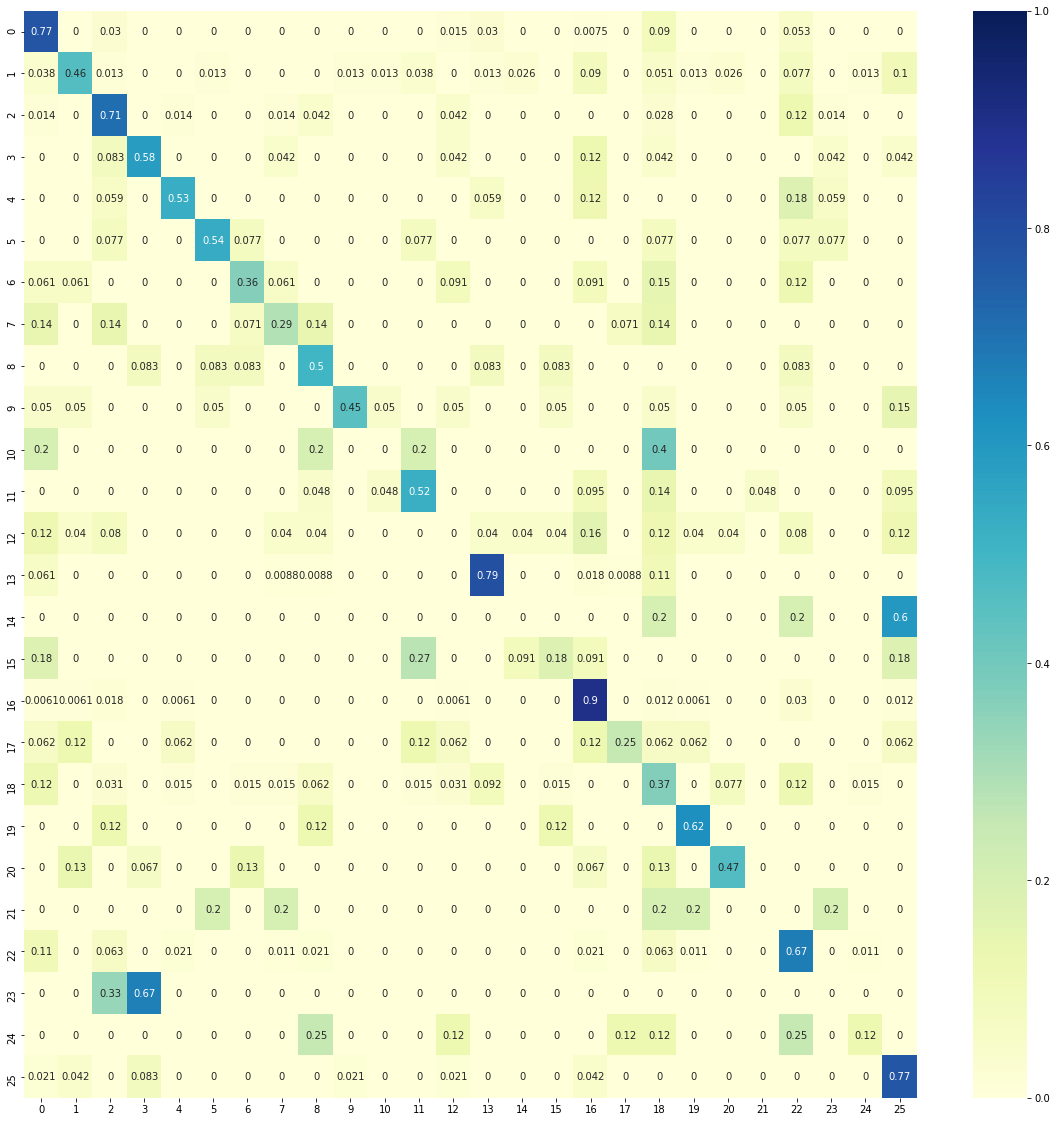

In [36]:
res_2 = ev.describe(trainer, x_2, mask_2, y_2)

In [37]:
res_2

((643, 1024, 0.6279296875),
 {0: (103, 146, 0.7054794520547946),
  1: (36, 47, 0.7659574468085106),
  2: (51, 77, 0.6623376623376623),
  3: (14, 22, 0.6363636363636364),
  4: (9, 15, 0.6),
  5: (7, 11, 0.6363636363636364),
  6: (12, 18, 0.6666666666666666),
  7: (4, 13, 0.3076923076923077),
  8: (6, 24, 0.25),
  9: (9, 11, 0.8181818181818182),
  10: (0, 3, 0.0),
  11: (11, 22, 0.5),
  12: (0, 16, 0.0),
  13: (90, 104, 0.8653846153846154),
  14: (0, 4, 0.0),
  15: (2, 7, 0.2857142857142857),
  16: (147, 179, 0.8212290502793296),
  17: (4, 7, 0.5714285714285714),
  18: (24, 86, 0.27906976744186046),
  19: (5, 11, 0.45454545454545453),
  20: (7, 15, 0.4666666666666667),
  21: (0, 1, 0.0),
  22: (64, 114, 0.5614035087719298),
  23: (0, 5, 0.0),
  24: (1, 4, 0.25),
  25: (37, 62, 0.5967741935483871)},
 {0: (103, 133, 0.7744360902255639),
  1: (36, 78, 0.46153846153846156),
  2: (51, 72, 0.7083333333333334),
  3: (14, 24, 0.5833333333333334),
  4: (9, 17, 0.5294117647058824),
  5: (7, 13, 0.

In [38]:

x = torch.cat((x_1, x_2), 0)
mask = torch.cat((mask_1, mask_2), 0)
y = np.vstack([y_1, y_2])

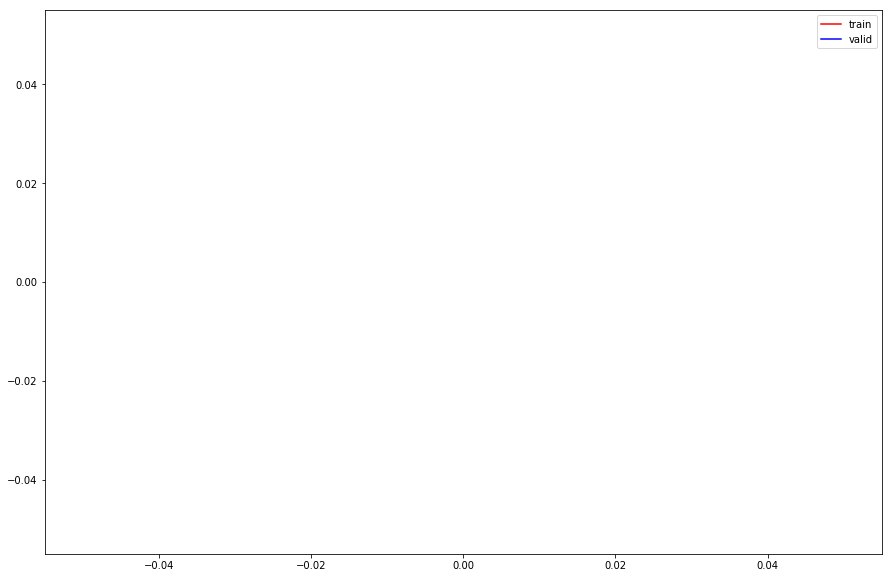

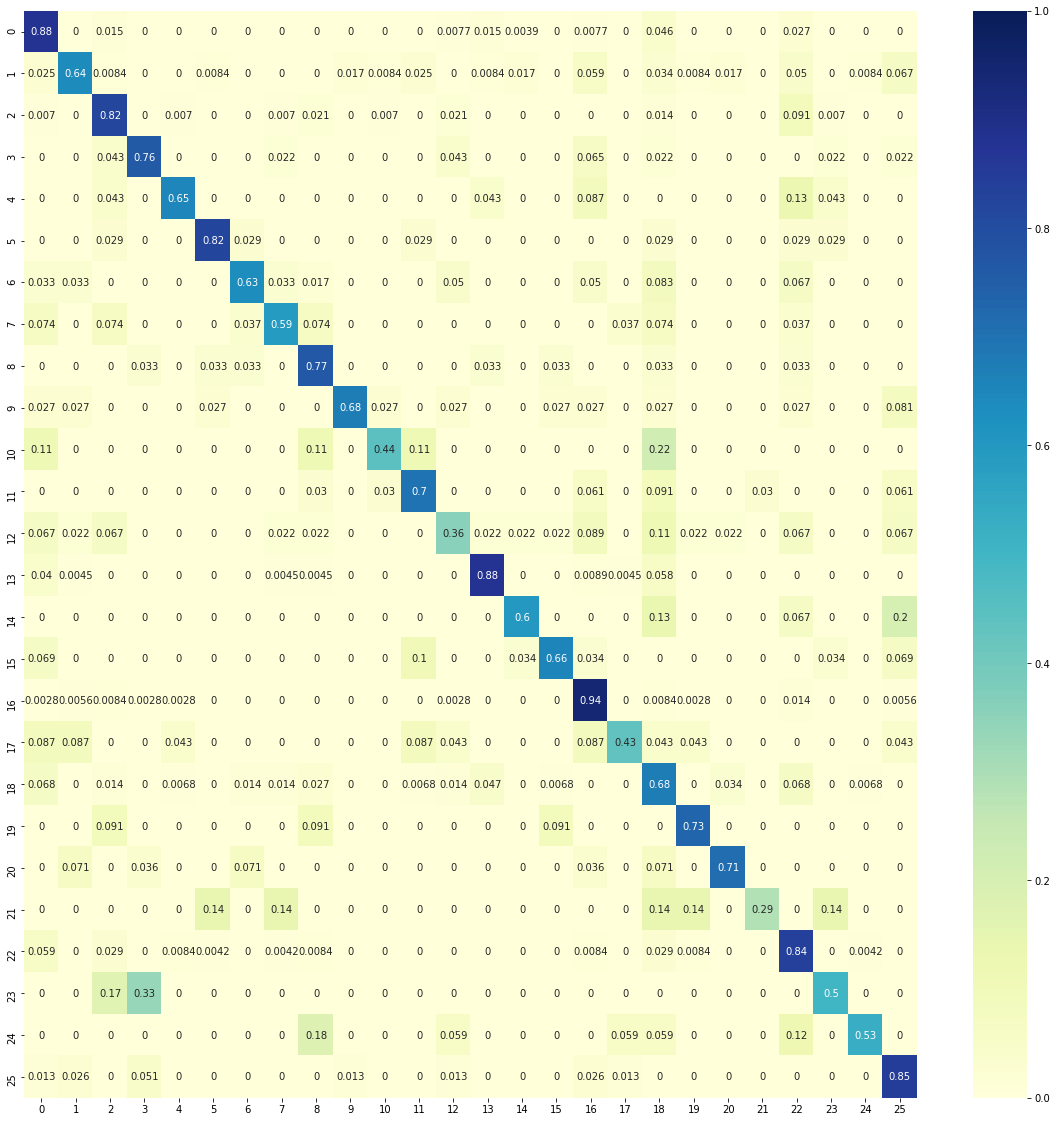

In [39]:
res = ev.describe(trainer, x, mask, y)

In [40]:
res

((1623, 2048, 0.79248046875),
 {0: (227, 279, 0.8136200716845878),
  1: (76, 89, 0.8539325842696629),
  2: (117, 145, 0.8068965517241379),
  3: (35, 44, 0.7954545454545454),
  4: (15, 21, 0.7142857142857143),
  5: (28, 33, 0.8484848484848485),
  6: (38, 45, 0.8444444444444444),
  7: (16, 26, 0.6153846153846154),
  8: (23, 43, 0.5348837209302325),
  9: (25, 28, 0.8928571428571429),
  10: (4, 8, 0.5),
  11: (23, 34, 0.6764705882352942),
  12: (16, 33, 0.48484848484848486),
  13: (196, 211, 0.9289099526066351),
  14: (9, 14, 0.6428571428571429),
  15: (19, 24, 0.7916666666666666),
  16: (339, 373, 0.9088471849865952),
  17: (10, 14, 0.7142857142857143),
  18: (100, 169, 0.591715976331361),
  19: (8, 15, 0.5333333333333333),
  20: (20, 28, 0.7142857142857143),
  21: (2, 3, 0.6666666666666666),
  22: (199, 257, 0.77431906614786),
  23: (3, 9, 0.3333333333333333),
  24: (9, 12, 0.75),
  25: (66, 91, 0.7252747252747253)},
 {0: (227, 259, 0.8764478764478765),
  1: (76, 119, 0.6386554621848739)